In [1]:
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import InputLayer, Flatten, Dense, Reshape, Input
from tensorflow.keras.models import Sequential, Model
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#inspiration taken from https://stackabuse.com/autoencoders-for-image-reconstruction-in-python-and-keras/

faces = fetch_olivetti_faces()

X = faces.data
y = faces.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.1, random_state=42)

In [3]:
def build_autoencoder(img_shape, code_size):
    encoder = Sequential()
    encoder.add(InputLayer(img_shape))
    encoder.add(Flatten())
    encoder.add(Dense(code_size))

    decoder = Sequential()
    decoder.add(InputLayer((code_size,)))
    decoder.add(Dense(np.prod(img_shape)))
    decoder.add(Reshape(img_shape))

    return encoder, decoder

In [4]:
IMG_SHAPE = X.shape[1:]
code_size = 1024
encoder, decoder = build_autoencoder(IMG_SHAPE, code_size)

inp = Input(IMG_SHAPE)
code = encoder(inp)
reconstruction = decoder(code)

autoencoder = Model(inp, reconstruction)
autoencoder.compile(optimizer='adamax', loss='mse')
autoencoder.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 4096)]            0         
_________________________________________________________________
sequential (Sequential)      (None, 1024)              4195328   
_________________________________________________________________
sequential_1 (Sequential)    (None, 4096)              4198400   
Total params: 8,393,728
Trainable params: 8,393,728
Non-trainable params: 0
_________________________________________________________________


In [5]:
history = autoencoder.fit(x=X_train, y=X_train, epochs=200, validation_data=[X_test, X_test], verbose=0, shuffle=True)
print('Done')

Done


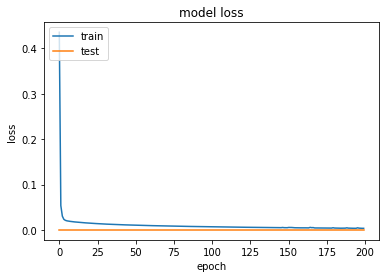

In [6]:
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [7]:
def visualize(img, encoder, decoder):
    """Draws original, encoded and decoded image"""
    code = encoder.predict(img[None])[0]
    reco = decoder.predict(code[None])[0]

    plt.subplot(1,3,1)
    plt.title("Original")
    plt.imshow(img.reshape(64,64))

    plt.subplot(1,3,2)
    plt.title("Code")
    plt.imshow(code.reshape([code.shape[-1]//8, -1]))
    # plt.imshow(code.reshape(16,-1))

    plt.subplot(1,3,3)
    plt.title("Reconstructed")
    plt.imshow(reco.reshape(64,64))
    plt.show()


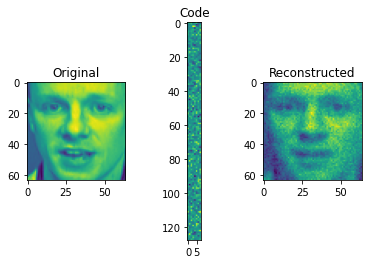

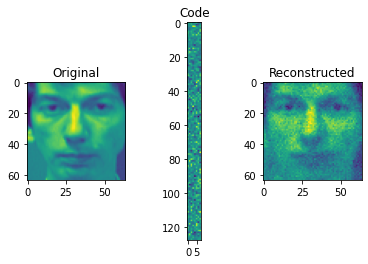

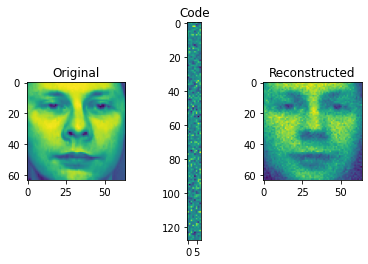

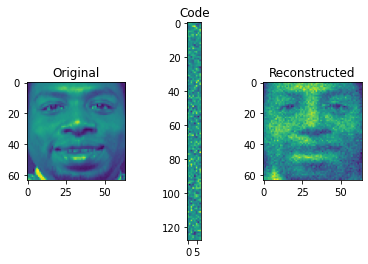

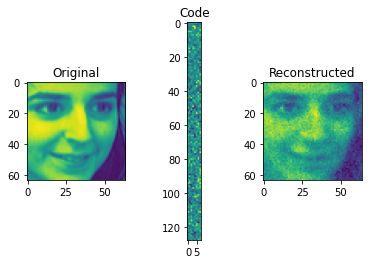

In [8]:
for i in range(5):
    img = X_test[i]
    visualize(img,encoder,decoder)

In [9]:
s = np.ones(1000)
s.shape
s.shape[-1]
s.reshape(s.shape[-1]//4, -1).shape

(250, 4)